<a href="https://colab.research.google.com/github/mehdiaraghi/mehdiaraghi/blob/master/Deep_learning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.datasets import mnist
(X_train,y_train), (X_test, y_test) = mnist.load_data()

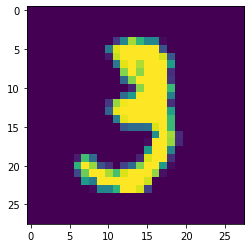

In [ ]:
plt.imshow(X_train[10])


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
y_train[10]

3

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_class =y_train.shape[1]

In [ ]:
def classification_model ():
  model = Sequential()
  model.add(Conv2D(16, (5,5) , strides=(1,1), activation = 'relu' , input_shape = (28,28,1)))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Conv2D(8, (2,2) , strides=(1,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation = 'relu'))
  model.add(Dense(num_class, activation = 'softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
model = classification_model()

model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= 10, batch_size = 200, verbose = 2)

Epoch 1/10
300/300 - 23s - loss: 0.4822 - accuracy: 0.8666 - val_loss: 0.1378 - val_accuracy: 0.9615 - 23s/epoch - 76ms/step
Epoch 2/10
300/300 - 23s - loss: 0.1219 - accuracy: 0.9643 - val_loss: 0.0793 - val_accuracy: 0.9767 - 23s/epoch - 76ms/step
Epoch 3/10
300/300 - 23s - loss: 0.0834 - accuracy: 0.9748 - val_loss: 0.0644 - val_accuracy: 0.9798 - 23s/epoch - 77ms/step
Epoch 4/10
300/300 - 22s - loss: 0.0674 - accuracy: 0.9797 - val_loss: 0.0588 - val_accuracy: 0.9822 - 22s/epoch - 72ms/step
Epoch 5/10
300/300 - 22s - loss: 0.0556 - accuracy: 0.9829 - val_loss: 0.0470 - val_accuracy: 0.9840 - 22s/epoch - 72ms/step
Epoch 6/10
300/300 - 22s - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0421 - val_accuracy: 0.9865 - 22s/epoch - 72ms/step
Epoch 7/10
300/300 - 22s - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0392 - val_accuracy: 0.9864 - 22s/epoch - 72ms/step
Epoch 8/10
300/300 - 23s - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0408 - val_accuracy: 0.9876 - 23s/epoch - 77ms/step


In [ ]:
scores = model.evaluate(X_test,y_test,verbose=2)

313/313 - 2s - loss: 0.0349 - accuracy: 0.9877 - 2s/epoch - 7ms/step


In [ ]:
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9876999855041504 
 Error: 1.230001449584961
